In [4]:
from collections import defaultdict, Counter
import math
math.inf = float('Inf')
class FixedQueue:
        def __init__(self, size):
            self.counter = 0
            self.size = size
            self.data = [math.inf for i in range(size)]
            self.val = 0
            self.cnt = 0
        def insert(self, x):
            self.cnt += 1
            self.val += x
            if self.data[self.counter] != math.inf:
                self.val -= self.data[self.counter]
            self.data[self.counter] = x
            self.counter = (self.counter + 1) % self.size
        def get_val(self):
            if self.cnt < self.size:
                return math.inf
            return self.val
        def __repr__(self):
            return str(self.data)


def serial(iter):
    for i in iter:
        yield i.get_val()
def answer(s, t):
    indexes = defaultdict()
    
    t = Counter(t)
    out = {}
    for i, count in t.items():
        indexes[i] = FixedQueue(count)
    m = math.inf
    left, right = 0, 0
    for i, e in enumerate(s):
        if e in t:
            # do something here

            indexes[e].insert(i)
            tmp = list(serial(indexes.values()))
    #         print(tmp)
            _max, _min = max(tmp), min(tmp)
            tp = _max - _min
            if m > tp:
                m = tp
                left, right = _min, _max
    if m != math.inf:
        return s[left-1:right+1]
    else:
        return ""

answer(s = "asa", t ="asa")


'asa'

In [7]:
data = [2, 4, 2]
opt = True
for i in data:
    while i % 2 == 0:
        i /= 2
        opt = not opt
opt
        
    


True

In [79]:
import math
from collections import defaultdict
graph = defaultdict(defaultdict)
for i in range(10):
    for j in range(10):
        graph[i][j] = abs(i - j)


import datetime
dp  = {}
def dfs(g, start, depth, weight):
    global dp
    if weight == 0 and depth == 0:
        return True
    elif depth == 0 or weight < 0:
        return False
    else:
        key = (start, depth, weight)
        if key in dp:
            return dp[key]
        tmp = 0
        for i in range(10):
            tmp += dfs(g, i, depth -1,weight - g[start][i])
        dp[key] = tmp
        return tmp
t = int(input())
for _ in range(t):
    count = 0
    _depth, _weight = list(map(int, input().strip().split()))
    for i in range(1, 10):
        count += dfs(g = graph, start = i,depth = _depth -1,weight =  _weight )


    print(count % 1000007)

1
10 0
9


In [100]:
class Solution(object):
    def longestValidParentheses(self, s):
        dp = []
        # s = '))))'
        prev = []
        counter = 0
        for i, e in enumerate(s):
            if e == ')':
                if counter == 0:
                    dp += [0]
                else:
                    dp += [1]
                    counter -= 1
                    prev.pop()
            else:
                counter += 1
                dp += [1]
                prev.append(i)
        for i in prev:
            dp[i] = 0
#         print(dp, counter)
        counter = 0
        m = 0
        for i in dp:
            if i == 1:
                counter += 1
            else:
                
                m = max(m, counter)
                counter = 0
        m = max(m, counter)
        return m
        
Solution().longestValidParentheses("()(()")
        
                
                
        
        

[1, 1, 0, 1, 1] 1


2

In [196]:
from collections import defaultdict
n, k = 6, 3
edges = [(0, 1), (1, 2), (2, 3), (2, 4), (3, 5)]
n, k = 3, 1
edges = [(0, 1), (1, 2)]
graph = defaultdict(list)
for i, j in edges:
    graph[i].append(j)
def rev(f,t):
    while f > t:
        yield f
        f -= 1
def ncr(n, r):
    if r == 0:
        return 1
    top = 1
    for i in rev(n,n-r):
        top *= i
    bottom = 1
    
    for i in range(1,r+1):
        bottom *= i
#     print(top, bottom)
    return top // bottom

def bfs(g, src, depth):
 
    if depth == 0:
        return 1
    else:
        count = 1
        for i in graph[src]:
            bfs(g, i, depth -1)
        t = 0
        l = len(graph[src])
        print((l))
        while t <= l and l != 0:
            count += ncr(l,t)
            t += 1
        return count 
t = int(input())
for _ in range(t):
#     n, k = list(map(int, input().strip().split()))
#     edges = []
#     for i in range(n - 1):
#         edges += [tuple(map(int, input().strip().split()))]
    count = 0
    for i in range(n):
        count += bfs(graph, i, k) + n -1 
    print(count -1)
    if _ != t - 1:
        input()

0


In [195]:
t = int(input())
for _ in range(t):
    n = int(input())
    array = list(map(int, input().strip().split()))
    suffix = sum(array)
    prefix = array[0]
    i = 1
    # print(prefix , suffix,prefix + suffix)
    m = prefix + suffix
    j = 0
    while i < n:
        prefix += array[i]
        suffix -= array[i - 1]
        val = prefix + suffix
        if m > val:
            m = val
            j = i
        i += 1
    print(j + 1)
    
# else:
#     print(prefix , suffix,prefix + suffix)
    

0


In [ ]:
from collections import Counter
s = ("likecs", "venivedivici","bhuvan","codechef")
for i in s:
    d = Counter(i)
    d = max(d.values())
    if d == 1:
        print('no')
    else:
        print('yes')

In [1]:
n, k = 4, 2
street = [1, 2, 3, 4, 3, 3,2,5,3,7,2,4,1,5,6]
street = street + street + street + street + street + street + street + street + street + street + street + street 
n = len(street)
# n, k = list(map(int, input().strip().split()))
# street = list(map(int, input().strip().split()))
dp =  {}
def dfs(g, src, dst, k, prod = 1):
    global dp
    prod *= g[src]
#     print(g[src],g[dst], prod)
    if src == dst:
        return prod
    else:
        i = src + 1
        m = float('Inf')
        key = (src,dst,prod)
        if key in dp:
#             print('yes')
            return dp[key]
        while i <= dst:
            t = i - src
            if  t >= 1 and t <= k:
                m = min(m, dfs(g, i, dst, k, prod))
            else:
                break
            i += 1
        dp[key] = m
        return m
out = dfs(street, 0, n -1, k)
if  out == float('Inf'):
    print(-1)
else:
    print(out % 1000000007)
                
                
        
        
        
        
        
        
        

KeyboardInterrupt: 

In [13]:
from collections import Counter
a, b = 1, 100
s = '11'
s = Counter(s)
n = s['1']
if a == 1:
    print(n)
else:
    print(int((a ** (n + 1) -1)/(a-1) -1))



2


18.9246444161 43.6028189727 117.472536611 


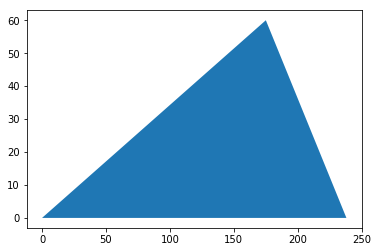

10.2043305047 33.398488468 136.397181027 


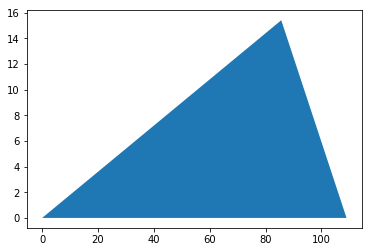

10.7786235199 22.619864948 146.601511532 


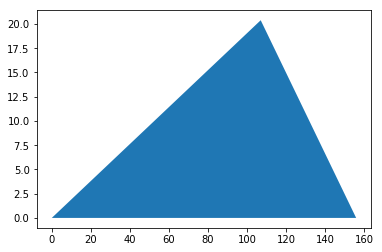

11.198678673 11.421186275 157.380135052 


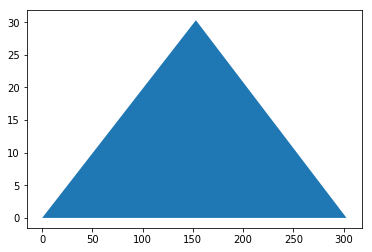

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import math

def calc_angles(a,b,c):
    alpha = np.arccos(  (b**2 + c**2 - a**2) /(2.*b*c) )
    beta = np.arccos(  (-b**2 + c**2 + a**2) /(2.*a*c) )
    gamma = np.pi-alpha-beta
    return alpha, beta, gamma
8
def calc_point(alpha, beta, c):
    x = (c*np.tan(beta) )/( np.tan(alpha) + np.tan(beta) )
    y = x * np.tan(alpha)
    return (x,y)

def get_triangle(a,b,c):
    z = np.array([a,b,c])
    while z[-1] != z.max():
        z = z[[2,0,1]] # make sure last entry is largest
    alpha, beta, _ = calc_angles(*z)
    x,y = calc_point(alpha, beta, z[-1])
    return [(0,0), (z[-1],0), (x,y)]



t = [(3, 4, 5), (5, 4, 3), (3, 4, 5), (4, 3, 5)]
t = [(238, 185, 87),(109, 87, 28),(156, 109, 53),(303, 156, 153)]
for x in t:
    
    m = calc_angles(*sorted(x))
    for i in m:
        print(i/math.pi * 180, end=" ")
    print()
        
        
    fig, ax = plt.subplots()
    # ax.set_aspect("equal")

    dreieck = plt.Polygon(get_triangle(*sorted(x)))
    ax.add_patch(dreieck)
    # ax.relim()
    ax.autoscale_view()
    plt.show()

In [73]:
a = [3, 8, 5, 10, 7,4,5,54,3,3,4,5,4,3,3,4,5,4,3,3,4,4,3,3,4,43,3,3,3,4,33,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3]
a += (a + a+ a + a + a)
a += a
a += a
dp = {}
def dfs(g, src, dst, s):
    global dp
    if src == dst:
#         print(src,"end", s + g[src])
        return s + g[src]
    elif src > dst:
#         print(src,"same", s)
        return s
    else:
        
        i = src + 2
        s += g[src]
#         print(src, s)
        t = 0
        key = (src,s)
        if key in dp:
#             print('exist')
            return dp[key]
        for i in range(2, 4):
            t = max(t, dfs(g, src + i, dst, s))
        dp[key] = t
        return t
print(len(a))
max(dfs(a, 0, len(a) -1, 0),dfs(a, 1, len(a) -1, 0))
            

1176


5064

In [121]:
import itertools as it
import math
w = [238, 185, 87]
x = [109, 87, 28]
y = [156, 109, 53]
z = [303, 156, 153]

# w = [37, 20, 19]
# x = [80, 60, 100]
# y = [72, 80, 136]
# z = [37, 136, 164]
def area(a,b,c):
    try:
        s = (a + b + c) / 2
        val = math.sqrt(s * (s - a) * (s - b) * (s - c))
        return val
    except:
        return 0
t = int(input())
for _ in range(t):
    w = list(map(int,input().strip().split()))
    x = list(map(int,input().strip().split()))
    y = list(map(int,input().strip().split()))
    z = list(map(int,input().strip().split()))
    areas = []
    for i in [w, x, y, z]:
        areas += [area(*i)]
    myset = set()
    for i in range(2,5):
    #     print(i)
        for k in it.combinations(areas, i):
            myset.add(sum(k))
    #         print(k)

    # print(myset)
    x += ( w + y + z)
    comb =  [] + x

    for a,b in it.combinations(x, 2):
        comb.append(a +b)
    # print(comb)
    count = 0
    dp = set()
    for i in it.combinations(comb,3):
        i = tuple(sorted(i))
        if not i in dp:
            dp.add(i)
        else:
            continue
        count += 1
        if area(*i) in myset:
            print("Yes")
            break
    else:
        print("No")
#     print(count)
# print(area(*(182, 303, 472)))
# w = [37, 20, 19]
# x = [80, 60, 100]
# y = [72, 80, 136]
# z = [37, 136, 164]

1
Yes


In [123]:
cat = [{"cakewalk"},{"simple"},{"easy"},{"easy-medium","medium"},{"medium-hard","hard"}]
t = int(input())
for _ in range(t):
    n = int(input())
    read = set()
    for _ in range(n):
        s = input().strip()
        read.add(s)
    for i in cat:
        if len(read & i) == 0:
            print('No')
            break
    else:
        print('Yes')
            
            
        

1
5
cakewalk
easy
easy
medium
easy-medium
No


In [135]:
from collections import defaultdict
import itertools as it
import math
math.inf = float('Inf')
def inf():
    return math.inf
n = 3
def infdict():
    return defaultdict(inf)
cc = defaultdict(infdict)
ff = defaultdict(infdict)
for i in range(n):
    cc[i][i], ff[i][i] = 0, 0
    
c = [[1, 2, 3],[2, 3 ,2]]
f = [[1, 3 ,2],[2, 3 ,3]]
for i,j,w in c:
    i, j = i-1, j -1
    cc[i][j] = w
    cc[j][i] = w
for i,j,w in f:
    i, j = i-1, j -1
    ff[i][j] = w
    ff[j][i] = w


path = defaultdict(defaultdict)
def floyd(dist, v):
    for i in range(v):
        for j in range(v):
            for k in range(v):
                val = dist[j][i] + dist[i][k]
                if val  < dist[j][k]:
                    dist[j][k] = val
                    
    return dist

cc = floyd(cc, n)
ff = floyd(ff, n)
count = 0
for i, j in it.combinations(range(n), 2):
    count += min(cc[i][j], ff[i][j])
print(count)
                

7


In [17]:
import itertools as it
a = [7, 11, 9]
def and_all(it):
    it = iter(it)
    t = next(it)
    for i in it:
        t = t & i
    return t
count = 0
for i in range(1, len(a) + 1):
    for j in it.combinations(a, i):
        count += and_all(j)
print(count)

41


In [141]:
from math import sqrt
t = int(input())

for _ in range(t):
    n, m = list(map(int, input().strip().split()))
    elms = list(map(int, input().strip().split()))
    elms.sort()
    tot = n * (n + 1) /2
    for _ in range(m):
        q = int(input()) -1
        q = tot - q 
        x = 8 * (q) 
        x = sqrt(x) - 1
        x = int( x//2)
        print(elms[x])

1
4 3
2 1 4 3
1
4
4
4
5
3


In [58]:
from math import sqrt
n, m = 4, 3
elms = [4, 3, 2, 1]
#     n, m = list(map(int, input().strip().split()))
#     elms = list(map(int, input().strip().split()))
elms.sort()
q = 1
l = n
count = 0

while q > l:
    count  += 1
    
    q -= l
    l -= 1
print(elms[~count])

4


In [140]:
elms = [5, 4, 3, 2, 1]
elms.sort()
q = 15
q -= 1
n = len(elms)
tot = n * (n + 1) /2
q = tot - q 
x = 8 * (q) 
x = sqrt(x) - 1
x = int( x//2)
print(elms[x] , x, q)

1 0 1.0


In [144]:
import pip
list(map(lambda x:str(x).split()[0],pip.get_installed_distributions()))

['zope.interface',
 'youtube-dl',
 'xhtml2pdf',
 'wkhtmltopdf',
 'widgetsnbextension',
 'whitenoise',
 'wheel',
 'Werkzeug',
 'websocket-client',
 'webencodings',
 'WeasyPrint',
 'wcwidth',
 'vega',
 'universe',
 'ujson',
 'txaio',
 'Twisted',
 'traitlets',
 'tqdm',
 'tornado',
 'torchvision',
 'torch',
 'tinycss2',
 'tinycss',
 'Theano',
 'testpath',
 'terminado',
 'tensorflow',
 'tensorflow-tensorboard',
 'sounddevice',
 'sklearn',
 'sk-video',
 'simplegeneric',
 'setuptools',
 'setupfiles',
 'selenium',
 'scipy',
 'scikit-learn',
 'request',
 'query-string',
 'qtconsole',
 'pyzmq',
 'PyYAML',
 'pytz',
 'python-dateutil',
 'Pyphen',
 'PyPDF2',
 'pypcd',
 'Pygments',
 'pyglet',
 'pygame',
 'pycparser',
 'public',
 'ptyprocess',
 'psycopg2',
 'protobuf',
 'prompt-toolkit',
 'post',
 'pip',
 'Pillow',
 'pickleshare',
 'pexpect',
 'pdfkit',
 'pandocfilters',
 'pandas',
 'opencv-python',
 'olefile',
 'numpy',
 'notebook',
 'nbformat',
 'nbconvert',
 'mysqlclient',
 'moviepy',
 'mkdocs',
 

In [151]:
import sys, queue
sys.builtin_module_names
queue.

('_ast',
 '_bisect',
 '_codecs',
 '_collections',
 '_datetime',
 '_elementtree',
 '_functools',
 '_heapq',
 '_imp',
 '_io',
 '_locale',
 '_md5',
 '_operator',
 '_pickle',
 '_posixsubprocess',
 '_random',
 '_sha1',
 '_sha256',
 '_sha512',
 '_signal',
 '_socket',
 '_sre',
 '_stat',
 '_string',
 '_struct',
 '_symtable',
 '_thread',
 '_tracemalloc',
 '_warnings',
 '_weakref',
 'array',
 'atexit',
 'binascii',
 'builtins',
 'errno',
 'faulthandler',
 'fcntl',
 'gc',
 'grp',
 'itertools',
 'marshal',
 'math',
 'posix',
 'pwd',
 'pyexpat',
 'select',
 'spwd',
 'sys',
 'syslog',
 'time',
 'unicodedata',
 'xxsubtype',
 'zipimport',
 'zlib')

In [149]:

import bisect
help(bisect)

Help on module bisect:

NAME
    bisect - Bisection algorithms.

MODULE REFERENCE
    https://docs.python.org/3.5/library/bisect.html
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

FUNCTIONS
    bisect(...)
        Alias for bisect_right().
    
    bisect_left(...)
        bisect_left(a, x[, lo[, hi]]) -> index
        
        Return the index where to insert item x in list a, assuming a is sorted.
        
        The return value i is such that all e in a[:i] have e < x, and all e in
        a[i:] have e >= x.  So if x already appears in the list, i points just
        before the leftmost x already there.
        
        Optional args lo (default 0) and hi (default len(a)) bound the
        slice of a to be

In [169]:
import http.server as server

help(server.HTTPServer)

Help on class HTTPServer in module http.server:

class HTTPServer(socketserver.TCPServer)
 |  Base class for various socket-based server classes.
 |  
 |  Defaults to synchronous IP stream (i.e., TCP).
 |  
 |  Methods for the caller:
 |  
 |  - __init__(server_address, RequestHandlerClass, bind_and_activate=True)
 |  - serve_forever(poll_interval=0.5)
 |  - shutdown()
 |  - handle_request()  # if you don't use serve_forever()
 |  - fileno() -> int   # for selector
 |  
 |  Methods that may be overridden:
 |  
 |  - server_bind()
 |  - server_activate()
 |  - get_request() -> request, client_address
 |  - handle_timeout()
 |  - verify_request(request, client_address)
 |  - process_request(request, client_address)
 |  - shutdown_request(request)
 |  - close_request(request)
 |  - handle_error()
 |  
 |  Methods for derived classes:
 |  
 |  - finish_request(request, client_address)
 |  
 |  Class variables that may be overridden by derived classes or
 |  instances:
 |  
 |  - timeout
 |

In [ ]:
import http.server as server
import socketserver as socket
class MyServer(server.HTTPServer):
    def finish_request(req, client):
        return "Hello"
socket.TCPServer(('', 9091), MyServer).serve_forever()

----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 59454)
----------------------------------------
----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 59458)
----------------------------------------
----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 59462)
----------------------------------------


Traceback (most recent call last):
  File "/usr/lib/python3.5/socketserver.py", line 313, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.5/socketserver.py", line 341, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.5/socketserver.py", line 354, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.5/socketserver.py", line 440, in __init__
    self.server_bind()
  File "/usr/lib/python3.5/http/server.py", line 138, in server_bind
    socketserver.TCPServer.server_bind(self)
  File "/usr/lib/python3.5/socketserver.py", line 454, in server_bind
    self.socket.bind(self.server_address)
TypeError: getsockaddrarg: AF_INET address must be tuple, not socket
Traceback (most recent call last):
  File "/usr/lib/python3.5/socketserver.py", line 313, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.

----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 59466)
----------------------------------------


Traceback (most recent call last):
  File "/usr/lib/python3.5/socketserver.py", line 313, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.5/socketserver.py", line 341, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.5/socketserver.py", line 354, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.5/socketserver.py", line 440, in __init__
    self.server_bind()
  File "/usr/lib/python3.5/http/server.py", line 138, in server_bind
    socketserver.TCPServer.server_bind(self)
  File "/usr/lib/python3.5/socketserver.py", line 454, in server_bind
    self.socket.bind(self.server_address)
TypeError: getsockaddrarg: AF_INET address must be tuple, not socket


In [18]:
from collections import defaultdict
strides = [0,1,0,3,1,0,1,3,2,1,2,1]
graph = defaultdict(list)
for i, e in enumerate(strides):
    for j in range(1, e + 1):
        graph[j] += [i]
print(graph)
count = 0
for i, e in graph.items():
    x, y = it.tee(e)
    next(y)
    for i, j in zip(x, y):
        count += (( j - i) - 1)
print(count)

defaultdict(<class 'list'>, {1: [1, 3, 4, 6, 7, 8, 9, 10, 11], 2: [3, 7, 8, 10], 3: [3, 7]})
9


In [108]:
height = [0,3,0,2,1,0,1,3,2,1,2,1]
stack = [(0,0, 0)]
previousBuildingHeight = 0
count = 0
for newPosition, newHeight in enumerate(height):
    print(stack)
    print((newPosition, newHeight))
    tPos, tHeight, ah = stack.pop()
    while not ah >= newHeight and len(stack) > 0:
        print("in <", (tPos, tHeight))
        print(((newPosition - tPos)-1 )* tHeight)
        count += ((newPosition - tPos)-1 )* tHeight
        tPos, tHeight, ah = stack.pop()
    if ah > newHeight:
        print("out >")
        print(((newPosition - tPos)-1 )* newHeight)
        count += ((newPosition - tPos)-1 )* newHeight
        stack.append((tPos, tHeight - newHeight, tHeight))
        
    else:
        print("out =")
        print(((newPosition - tPos)-1 )* tHeight)
        count += ((newPosition - tPos)-1 )* tHeight
    stack.append((newPosition, newHeight, newHeight))
    print(stack)
    print("-"*60)
    
    
        
        
        
        
    
#        #
#    #   ## #
# _#_##_######
count

[(0, 0, 0)]
(0, 0)
out =
0
[(0, 0, 0)]
------------------------------------------------------------
[(0, 0, 0)]
(1, 3)
out =
0
[(1, 3, 3)]
------------------------------------------------------------
[(1, 3, 3)]
(2, 0)
out >
0
[(1, 3, 3), (2, 0, 0)]
------------------------------------------------------------
[(1, 3, 3), (2, 0, 0)]
(3, 2)
in < (2, 0)
0
out >
2
[(1, 1, 3), (3, 2, 2)]
------------------------------------------------------------
[(1, 1, 3), (3, 2, 2)]
(4, 1)
out >
0
[(1, 1, 3), (3, 1, 2), (4, 1, 1)]
------------------------------------------------------------
[(1, 1, 3), (3, 1, 2), (4, 1, 1)]
(5, 0)
out >
0
[(1, 1, 3), (3, 1, 2), (4, 1, 1), (5, 0, 0)]
------------------------------------------------------------
[(1, 1, 3), (3, 1, 2), (4, 1, 1), (5, 0, 0)]
(6, 1)
in < (5, 0)
0
out =
1
[(1, 1, 3), (3, 1, 2), (6, 1, 1)]
------------------------------------------------------------
[(1, 1, 3), (3, 1, 2), (6, 1, 1)]
(7, 3)
in < (6, 1)
0
in < (3, 1)
3
out =
5
[(7, 3, 3)]
-------

12